# 1.1 INDICE - CONTENIDO

In [345]:
print('1. Introduction')
print('2. Importacion de librerias')
print('3. Lectura de datos')
print('4. Anilisis por columna')
print('5. Busqueda y analisis de datos nulos')
print('5. Reemplazamiento de datos nulos y atipicos')
print('6. Creacion de nuevas columnas')
print('7. Visualizacion de datos')
print('8. Analisis mediante pivot_table')
print('9. Creacion de nuevo dataset(probability)')
print('10. Conclusiones')

1. Introduction
2. Importacion de librerias
3. Lectura de datos
4. Anilisis por columna
5. Busqueda y analisis de datos nulos
5. Reemplazamiento de datos nulos y atipicos
6. Creacion de nuevas columnas
7. Visualizacion de datos
8. Analisis mediante pivot_table
9. Creacion de nuevo dataset(probability)
10. Conclusiones


# 1.2 CONTEXTO - PROYECTO

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos
para ajustar el presupuesto de publicidad.
Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan y la
cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


# 1.3 CARGA DE LIBRERIAS

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as np
import scipy as np

# 1.4 CARGA DE DATOS

In [347]:
calls_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_calls.csv')
internet_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_internet.csv')
messages_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_messages.csv')
plans_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_plans.csv')
users_data = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Tarifas_moviles/megaline_users.csv')

In [348]:
calls_data

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [349]:
internet_data

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [350]:
messages_data

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [351]:
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [352]:
users_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


# 2.0 ANALISIS DE NULOS

In [353]:
messages_data.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [354]:
users_data.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [355]:
calls_data.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [356]:
internet_data.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [357]:
plans_data.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Vemos que hay varios datos nulos en el dataset users_data pero observamos que basicamente son todos aquellos que no tienen aun fecha de baja de la tarifa. Por lo que realmente esos datos nulos igualmente si nos aportan informacion.

#  2.1 PREPRACION DE DATASETS

## MESSAGES

In [358]:
messages = pd.merge(users_data, messages_data, on='user_id')

In [359]:
messages['payment_plan'] = messages['plan'].map({'surf': 20, 'ultimate': 70})

In [360]:
messages['limit_plan'] = messages['plan'].map({'surf': 50, 'ultimate': 1000})

In [361]:
messages['debt_fee'] = messages['plan'].map({'surf': 0.3, 'ultimate': 0.1})

In [362]:
messages['month'] = messages['message_date'].str.split('-', expand=True)[1]

In [363]:
messages['id'] = messages['id'].str.split('_', expand=True)[0]

In [395]:
messages['id'] = messages['id'].astype(int)

In [396]:
messages

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,message_date,payment_plan,limit_plan,debt_fee,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-27,70,1000,0.1,12
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-31,70,1000,0.1,12
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-31,70,1000,0.1,12
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-27,70,1000,0.1,12
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-26,70,1000,0.1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76046,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497,2018-12-24,70,1000,0.1,12
76047,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497,2018-12-24,70,1000,0.1,12
76048,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497,2018-12-31,70,1000,0.1,12
76049,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,1497,2018-12-24,70,1000,0.1,12


## CALLS

In [365]:
calls = pd.merge(users_data, calls_data, on='user_id')

In [366]:
calls['payment_plan'] = calls['plan'].map({'surf': 20, 'ultimate': 70})

In [367]:
calls['limit_plan'] = calls['plan'].map({'surf': 500, 'ultimate': 3000})

In [368]:
calls['debt_fee'] = calls['plan'].map({'surf': 0.3, 'ultimate': 0.1})

In [369]:
calls['month'] = calls['call_date'].str.split('-', expand=True)[1]

In [370]:
calls['id'] = calls['id'].str.split('_', expand=True)[0]

In [399]:
calls['id'] = calls['id'].astype(int)

In [400]:
calls

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,call_date,duration,payment_plan,limit_plan,debt_fee,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-27,8.52,70,3000,0.1,12
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-27,13.66,70,3000,0.1,12
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-27,14.48,70,3000,0.1,12
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-28,5.76,70,3000,0.1,12
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-30,4.22,70,3000,0.1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137730,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-11-21,8.72,20,500,0.3,11
137731,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-10-20,10.89,20,500,0.3,10
137732,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-09-21,8.12,20,500,0.3,09
137733,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-10-10,0.37,20,500,0.3,10


## INTERNET

In [372]:
internet = pd.merge(users_data, internet_data, on='user_id')

In [373]:
internet['payment_plan'] = internet['plan'].map({'surf': 20, 'ultimate': 70})

In [374]:
internet['limit_plan'] = internet['plan'].map({'surf': 15360, 'ultimate': 30720})

In [375]:
internet['debt_fee'] = internet['plan'].map({'surf': 10, 'ultimate': 7})

In [376]:
internet['month'] = internet['session_date'].str.split('-', expand=True)[1]

In [377]:
internet['id'] = internet['id'].str.split('_', expand=True)[0]

In [401]:
internet['id'] = internet['id'].astype(int)

In [403]:
internet

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,session_date,mb_used,payment_plan,limit_plan,debt_fee,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-29,89.86,70,30720,7,12
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-31,0.00,70,30720,7,12
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-28,660.40,70,30720,7,12
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-26,270.99,70,30720,7,12
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-27,880.22,70,30720,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104820,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-10-20,218.06,20,15360,10,10
104821,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-12-30,304.72,20,15360,10,12
104822,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-09-22,292.75,20,15360,10,09
104823,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-12-07,0.00,20,15360,10,12


# EDA - PROCESAMIENTO DE DATOS

Vamos a averiguar el numero de llamadas realizadas y minutos utilizados por mes y usuario

In [406]:
calls.pivot_table(index=['user_id', 'month', 'limit_plan'], values=['duration'], aggfunc='sum')

duration
user_id month limit_plan          
1000    12    3000          116.83
1001    08    500           171.14
        09    500           297.69
        10    500           374.11
        11    500           404.59
...                            ...
1498    12    500           324.77
1499    09    500           330.37
        10    500           363.28
        11    500           288.56
        12    500           468.10

[2258 rows x 1 columns]

Vamos a ver la cantidad de SMS enviados por mes.

In [407]:
messages.pivot_table(index=['user_id', 'month', 'limit_plan'], values=['id'], aggfunc='count')

id
user_id month limit_plan    
1000    12    1000        11
1001    08    50          30
        09    50          44
        10    50          53
        11    50          36
...                       ..
1496    09    50          21
        10    50          18
        11    50          13
        12    50          11
1497    12    1000        50

[1806 rows x 1 columns]

A continuacion observamos el volumen de datos por mes y usuario

In [408]:
internet.pivot_table(index=['user_id', 'month', 'limit_plan'], values=['mb_used'], aggfunc='count')

mb_used
user_id month limit_plan         
1000    12    30720             5
1001    08    15360            25
        09    15360            53
        10    15360            56
        11    15360            51
...                           ...
1498    12    15360            65
1499    09    15360            45
        10    15360            61
        11    15360            49
        12    15360            65

[2277 rows x 1 columns]

In [409]:
calls

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,id,call_date,duration,payment_plan,limit_plan,debt_fee,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-27,8.52,70,3000,0.1,12
1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-27,13.66,70,3000,0.1,12
2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-27,14.48,70,3000,0.1,12
3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-28,5.76,70,3000,0.1,12
4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,2018-12-30,4.22,70,3000,0.1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137730,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-11-21,8.72,20,500,0.3,11
137731,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-10-20,10.89,20,500,0.3,10
137732,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-09-21,8.12,20,500,0.3,09
137733,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,1499,2018-10-10,0.37,20,500,0.3,10


In [410]:
calls_debt = calls[['user_id', 'month', 'id', 'duration', 'payment_plan', 'limit_plan', 'debt_fee']]

In [411]:
calls_debt

,user_id,month,id,duration,payment_plan,limit_plan,debt_fee
0,1000,12,1000,8.52,70,3000,0.1
1,1000,12,1000,13.66,70,3000,0.1
2,1000,12,1000,14.48,70,3000,0.1
3,1000,12,1000,5.76,70,3000,0.1
4,1000,12,1000,4.22,70,3000,0.1
...,...,...,...,...,...,...,...
137730,1499,11,1499,8.72,20,500,0.3
137731,1499,10,1499,10.89,20,500,0.3
137732,1499,09,1499,8.12,20,500,0.3
137733,1499,10,1499,0.37,20,500,0.3


In [412]:
calls_debt.pivot_table(index=['user_id', 'month'], values=['id', 'duration'], aggfunc='sum')

duration     id
user_id month                 
1000    12       116.83  16000
1001    08       171.14  27027
        09       297.69  49049
        10       374.11  65065
        11       404.59  64064
...                 ...    ...
1498    12       324.77  58422
1499    09       330.37  61459
        10       363.28  79447
        11       288.56  67455
        12       468.10  97435

[2258 rows x 2 columns]

# ANALISIS DE DATOS

A continuacion vamos a analizar el habito de consumo de los usuarios: mensajes, datos y minutos de llamadas

In [415]:
calls.groupby('plan')['duration'].mean()

plan
surf        6.767264
ultimate    6.699939
Name: duration, dtype: float64

Podemos decir que los datos son similares y que no hay una diferencia significativa entre ellos.

In [422]:
calls.groupby('plan')['duration'].var()

plan
surf        34.156978
ultimate    33.964578
Name: duration, dtype: float64

Podemosm observar como los datos de la varianza indican que los datos estan muy dispersos

In [424]:
calls.groupby('plan')['duration'].std()

plan
surf        5.844397
ultimate    5.827914
Name: duration, dtype: float64

Unas desviaciones estandar de 5.82 y de 5.84 para los usuarios de los planes surf y ultimate respectivamente nos indican que los usuarios de ambos planes usan habitualmente la misma cantidad de minutos al mes

plan
surf        AxesSubplot(0.125,0.11;0.775x0.77)
ultimate    AxesSubplot(0.125,0.11;0.775x0.77)
Name: duration, dtype: object

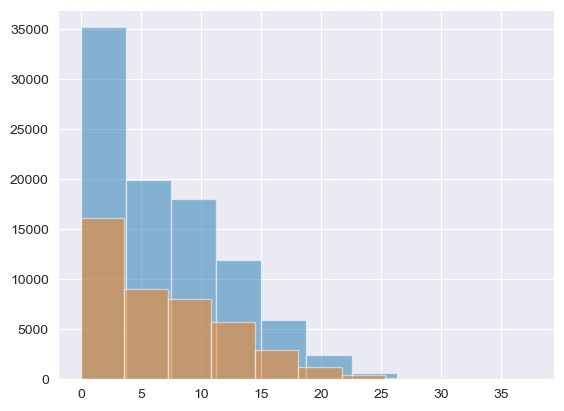

In [434]:
calls.groupby('plan')['duration'].hist(alpha=0.5, label=['plan surf', 'plan ultimate'])

El plan surf tiene una distribución normal y el plan ultimate tiene una distribución normal con una cola a la derecha, lo que significa que hay algunos usuarios que usan muchos minutos al mes y que se alejan de la media de los minutos que usan habitualmente los usuarios de cada plan

In [416]:
messages.groupby('plan')['id'].mean()

plan
surf        1251.113151
ultimate    1236.654030
Name: id, dtype: float64

Podemos decir que los datos son similares y que no hay una diferencia significativa entre ellos.

In [420]:
messages.groupby('plan')['id'].var()

plan
surf        17931.202139
ultimate    22368.221105
Name: id, dtype: float64

Podemosm observar como los datos de la varianza indican que los datos estan muy dispersos

In [426]:
messages.groupby('plan')['id'].std()

plan
surf        133.907439
ultimate    149.560092
Name: id, dtype: float64

Unas desviaciones estadar de 133 y 149 para los usuarios de los planes surf y ultimate respectivamente nos indican que los usuarios de ambos planes usan habitualmente la misma cantidad de mensajes al mes

plan
surf        AxesSubplot(0.125,0.11;0.775x0.77)
ultimate    AxesSubplot(0.125,0.11;0.775x0.77)
Name: id, dtype: object

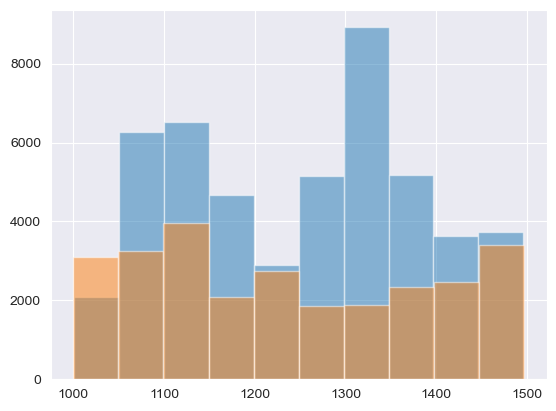

In [435]:
messages.groupby('plan')['id'].hist(alpha=0.5, label=['plan surf', 'plan ultimate'])

En este histograma podemos observar que el plan surf tiene una distribución normal y el plan ultimate tiene una distribución normal con una cola a la derecha, lo que significa que hay algunos usuarios que usan muchos mensajes al mes y que se alejan de la media de los mensajes que usan habitualmente los usuarios de cada plan

In [418]:
internet.groupby('plan')['mb_used'].mean()

plan
surf        363.844606
ultimate    372.892800
Name: mb_used, dtype: float64

Podemos decir que los datos son similares y que no hay una diferencia significativa entre ellos.

In [423]:
internet.groupby('plan')['mb_used'].var()

plan
surf        76192.150647
ultimate    78129.672672
Name: mb_used, dtype: float64

Podemosm observar como los datos de la varianza indican que los datos estan muy dispersos

In [427]:
internet.groupby('plan')['mb_used'].std()

plan
surf        276.029257
ultimate    279.516856
Name: mb_used, dtype: float64

Unas desviaciones estadar de 276 y 279 para los usuarios de los planes surf y ultimate respectivamente nos indican que los usuarios de ambos planes usan habitualmente la misma cantidad de mensajes al mes

plan
surf        AxesSubplot(0.125,0.11;0.775x0.77)
ultimate    AxesSubplot(0.125,0.11;0.775x0.77)
Name: mb_used, dtype: object

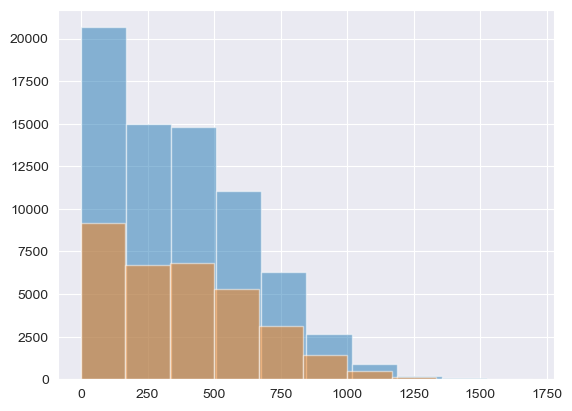

In [436]:
internet.groupby('plan')['mb_used'].hist(alpha=0.5, label=['plan surf', 'plan ultimate'])

En este histograma vemos que el plan surf tiene una distribución normal y el plan ultimate tiene una distribución normal con una cola a la derecha, lo que significa que hay algunos usuarios que usan mucha internet al mes y que se alejan de la media de los minutos que usan habitualmente los usuarios de cada plan